### importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

### loading the datasets

In [3]:
s_test = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 15\\SalaryData_Test(1).csv")
s_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
s_train = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 15\\SalaryData_Train(1).csv")
s_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### using isnull fucntion 

In [5]:
s_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
s_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### applying label encoder

In [7]:
s_train = s_train.apply(LabelEncoder().fit_transform)

s_test = s_test.apply(LabelEncoder().fit_transform)

### .info() function

In [9]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [10]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [11]:
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [12]:
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


### calculating and examing the skewness & kurtosis for train dataset for column Salary

In [13]:
print("Skewness of the Salary target variable for train dataset is : %f " %s_train["Salary"].skew())

print("Kurtosis of the Salary target variable for train dataset is : %f " %s_train["Salary"].kurt())

Skewness of the Salary target variable for train dataset is : 1.161357 
Kurtosis of the Salary target variable for train dataset is : -0.651292 


### calculating and examing the skewness & kurtosis for test dataset for column Salary

In [14]:
print("Skewness of the Salary target variable for test dataset is : %f " %s_test["Salary"].skew())

print("Kurtosis of the Salary target variable for test dataset is : %f " %s_test["Salary"].kurt())

Skewness of the Salary target variable for test dataset is : 1.181631 
Kurtosis of the Salary target variable for test dataset is : -0.603828 


### initializing the arrays for s_train dataset

In [15]:
X_train= s_train.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y_train= s_train['Salary']
print(np.unique(Y_train))
X_train.head()

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,24,0,39,0
1,33,12,0,0,12,0
2,21,8,0,0,39,0
3,36,6,0,0,39,0
4,11,12,0,0,39,0


### initializing the arrays for s_test dataset

In [16]:
X_test= s_test.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y_test= s_test['Salary']
print(np.unique(Y_test))
X_test.head()

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,0,0,39,0
1,21,8,0,0,49,0
2,11,11,0,0,39,1
3,27,9,87,0,39,1
4,17,5,0,0,29,0


### train_test_split

In [17]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((30161, 6), (30161,), (15060, 6), (15060,))

### Linear Support Vector Machine

In [18]:
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9285524568393094


### Radical Support Vector Machine

In [19]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.9285524568393094


### Sigmoid Support Vector Machine

In [20]:
svc_radical =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.7543160690571049


### Grid Search

In [21]:
clf = SVC(kernel='poly',C=1,gamma=0.33)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 99.99335989375831


array([[11360,     0],
       [    1,  3699]], dtype=int64)

### Classification Report

In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



### Visualization

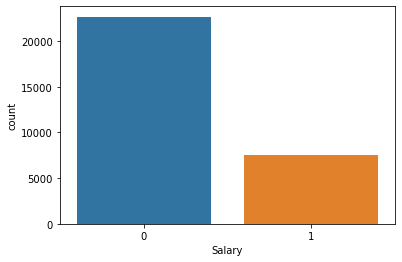

In [23]:
sns.countplot(s_train["Salary"])
plt.show()

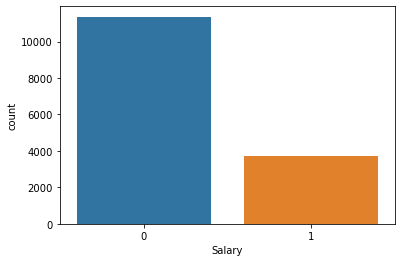

In [24]:
sns.countplot(s_test["Salary"])
plt.show()

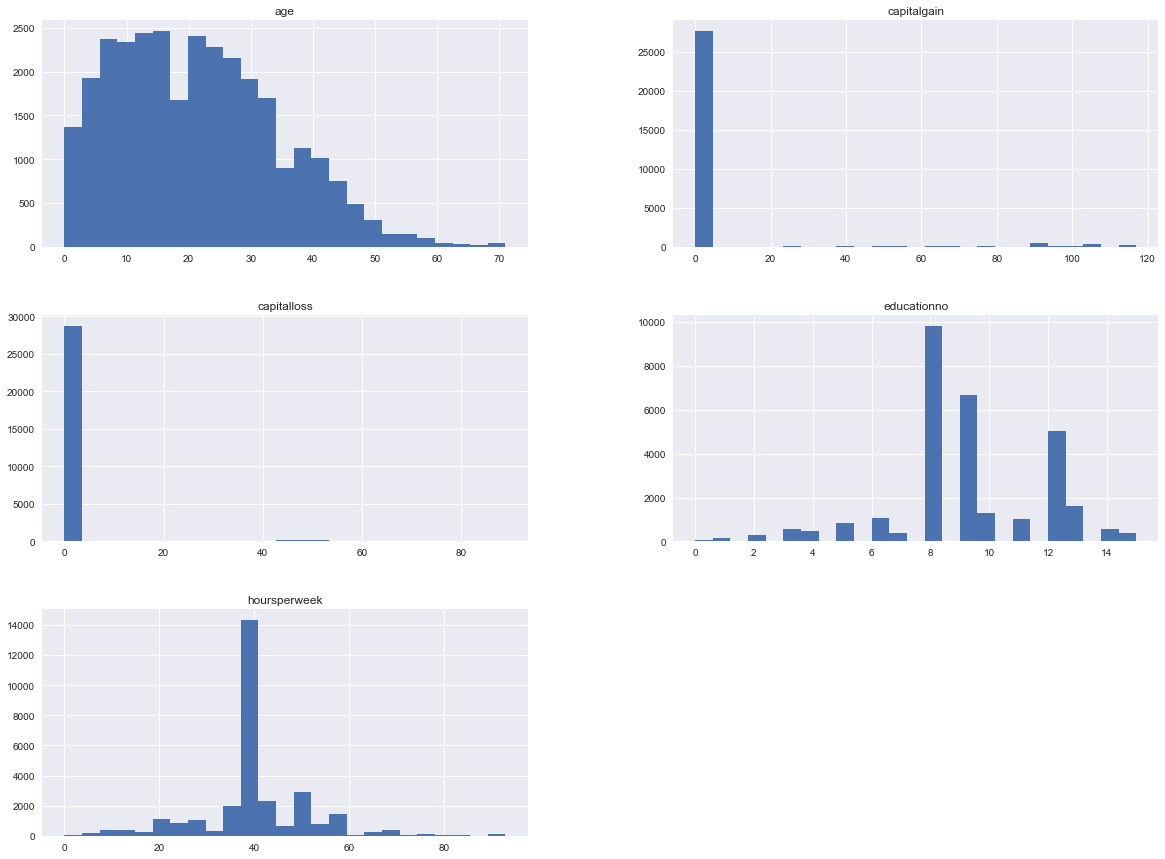

In [26]:
plt.style.use('seaborn')
s_train[["age", "educationno", "capitalgain","capitalloss","hoursperweek"]].hist(bins = 25, figsize = (20,15))
plt.show()

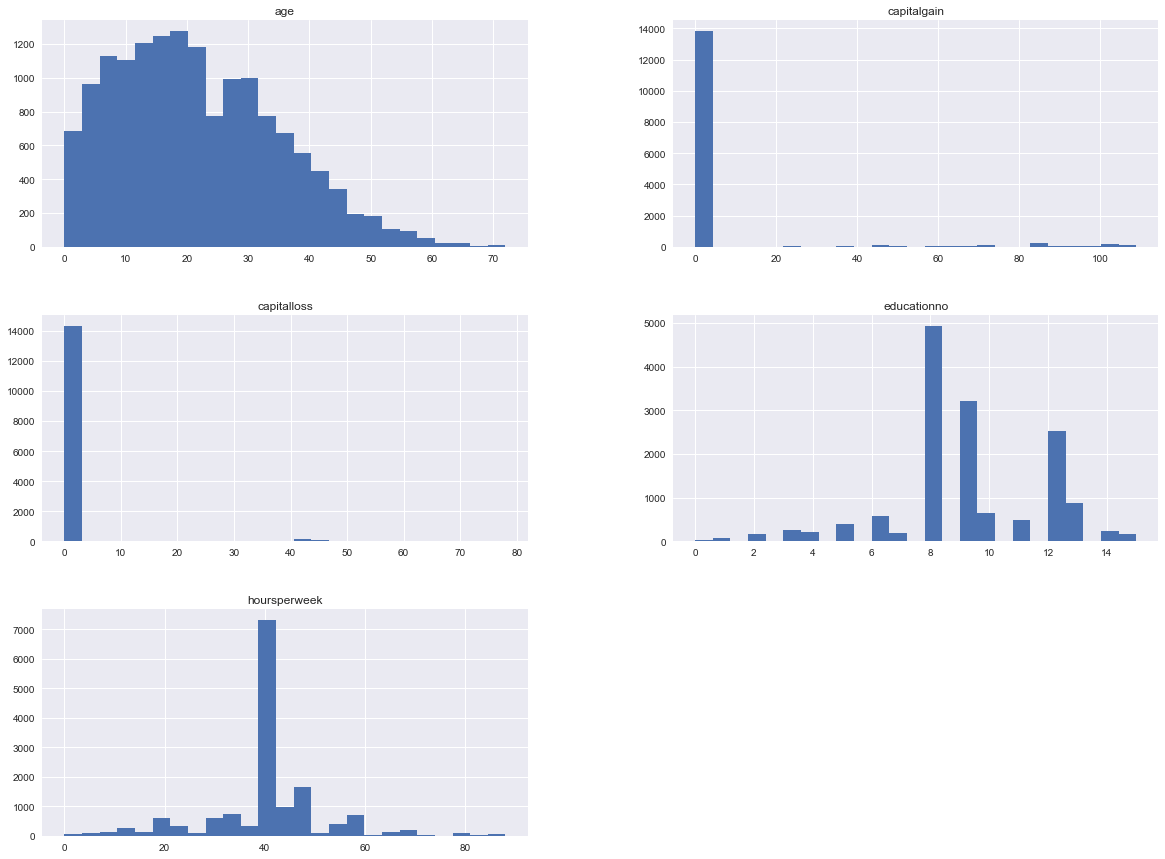

In [27]:
plt.style.use('seaborn')
s_test[["age", "educationno", "capitalgain","capitalloss","hoursperweek"]].hist(bins = 25, figsize = (20,15))
plt.show()